In [39]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import scipy.stats as sps


sns.set()

# SCRAPES THE LATEST DATA FROM WORLDOMETERS
url = 'https://www.worldometers.info/coronavirus/#countries'

r = requests.get(url)

c = r.content

soup = bs(c,'html.parser')

main_table = soup.findAll('table',{'id':'main_table_countries'})

table = main_table[0]

body = table.find('tbody')
rows = body.findAll('tr')

countries = dict()

for r in rows:
    td = r.findAll('td')
    name = td[0].get_text().strip()
    confirmed = td[1].get_text().strip()
    inc = td[2].get_text().strip()
    deaths = td[3].get_text().strip()
    d_inc = td[4].get_text().strip()
    recovered = td[5].get_text().strip()
    active_cases = td[6].get_text().strip()
    serious = td[7].get_text().strip()
    conf_p_M = td[8].get_text().strip()
    countries[name] = [confirmed,inc,deaths,d_inc,
                       recovered,active_cases,serious,conf_p_M]

cols = ['confirmed','inc','dead','dead_inc','recovered',
        'active_cases','serious','confirmed_per_M']

df = pd.DataFrame.from_dict(countries)
df = df.T
df.columns = cols



df[['inc','dead_inc']] = df[['inc','dead_inc']].apply(
    lambda x : x.str.replace('+',''))

df[['confirmed','dead','recovered','active_cases',
    'serious','inc','dead_inc']] = \
    df[['confirmed','dead','recovered','active_cases',
        'serious','inc','dead_inc']].apply(
    lambda x : x.str.replace(',',''))

df[cols] = df[cols].apply(lambda x: x.replace('',np.nan))


df[cols] = df[cols].astype(float)
df['yesterday'] = df['confirmed'] - df['inc']
df['factor'] = df['confirmed'] / df['yesterday']
cols  = ['confirmed', 'yesterday','inc', 'factor','dead', 'dead_inc', 'recovered', 'active_cases',
       'serious', 'confirmed_per_M']

df = df[cols]

#df['factor'].loc[df['factor'] == np.inf]
df['factor'] = df['factor'].replace(np.inf,np.nan)
df['dead_pct'] = 100 * df['dead'] / df['confirmed']
df['dead'] = df['dead'].fillna(0)

df.head(40)

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct
China,80880.0,80844.0,36.0,1.000445,3213.0,14.0,67819.0,9848.0,3226.0,56.2,3.972552
Italy,24747.0,NaN,NaN,NaN,1809.0,NaN,2335.0,20603.0,1672.0,409.3,7.309977
Iran,14991.0,13938.0,1053.0,1.075549,853.0,129.0,4590.0,9548.0,NaN,178.5,5.690081
Spain,9428.0,7988.0,1440.0,1.180270,335.0,41.0,530.0,8563.0,272.0,201.6,3.553246
S. Korea,8236.0,8162.0,74.0,1.009066,75.0,NaN,1137.0,7024.0,59.0,160.6,0.910636
Germany,6924.0,5813.0,1111.0,1.191123,14.0,1.0,59.0,6851.0,2.0,82.6,0.202195
France,5423.0,NaN,NaN,NaN,127.0,NaN,12.0,5284.0,400.0,83.1,2.341877
USA,4046.0,3680.0,366.0,1.099457,71.0,3.0,73.0,3902.0,12.0,12.2,1.754820
Switzerland,2221.0,2217.0,4.0,1.001804,18.0,4.0,4.0,2199.0,NaN,256.6,0.810446
UK,1543.0,1391.0,152.0,1.109274,36.0,1.0,20.0,1487.0,20.0,22.7,2.333117


In [2]:
today = pd.to_datetime('today').strftime('%Y-%m-%d %H:%M:%S')
file_prefix = 'snapshots/corona_snapshot_'
filename = file_prefix + today.replace(' ','_').replace(':','_') + '.pkl'
df['datetime'] = [today] * len(df)
df.set_index([df.index,'datetime'],drop=True).to_pickle(filename)
df.head()

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
China,80880.0,80844.0,36.0,1.000445,3213.0,14.0,67819.0,9848.0,3226.0,56.2,3.972552,2020-03-16 16:54:13
Italy,24747.0,NaN,NaN,NaN,1809.0,NaN,2335.0,20603.0,1672.0,409.3,7.309977,2020-03-16 16:54:13
Iran,14991.0,13938.0,1053.0,1.075549,853.0,129.0,4590.0,9548.0,NaN,178.5,5.690081,2020-03-16 16:54:13
Spain,9428.0,7988.0,1440.0,1.180270,335.0,41.0,530.0,8563.0,272.0,201.6,3.553246,2020-03-16 16:54:13
S. Korea,8236.0,8162.0,74.0,1.009066,75.0,NaN,1137.0,7024.0,59.0,160.6,0.910636,2020-03-16 16:54:13


In [3]:
import glob
files = [f for f in glob.glob('./' + file_prefix +'*')]

timeline_df = pd.DataFrame()

for f in files:
    temp = pd.read_pickle(f)
    timeline_df = pd.concat([timeline_df,temp],axis=0)
    
timeline_df.sort_index(inplace=True)
timeline_df['dead'] = timeline_df['dead'].fillna(0)
timeline_df

confirmed  yesterday  inc    factor  dead  \
            datetime                                                         
Afghanistan 2020-03-15 15:50:08       16.0       11.0  5.0  1.454545   0.0   
            2020-03-15 16:55:44       16.0       11.0  5.0  1.454545   0.0   
            2020-03-15 19:43:02       16.0       11.0  5.0  1.454545   0.0   
            2020-03-15 21:46:07       16.0       11.0  5.0  1.454545   0.0   
            2020-03-15 22:21:09       16.0       11.0  5.0  1.454545   0.0   
...                                    ...        ...  ...       ...   ...   
Vietnam     2020-03-16 14:09:44       59.0       57.0  2.0  1.035088   0.0   
            2020-03-16 14:22:25       59.0       57.0  2.0  1.035088   0.0   
            2020-03-16 16:04:29       61.0       57.0  4.0  1.070175   0.0   
            2020-03-16 16:35:41       61.0       57.0  4.0  1.070175   0.0   
            2020-03-16 16:54:13       61.0       57.0  4.0  1.070175   0.0   

                                 dead_inc  recovered  active_cases  serious  \
            datetime                                                          
Afghanistan 2020-03-15 15:50:08       NaN        1.0          15.0      NaN   
            2020-03-15 16:55:44       NaN        1.0          15.0      NaN   
            2020-03-15 19:43:02       NaN        1.0          15.0      NaN   
            2020-03-15 21:46:07       NaN        1.0          15.0      NaN   
            2020-03-15 22:21:09       NaN        1.0          15.0      NaN   
...                                   ...        ...           ...      ...   
Vietnam     2020-03-16 14:09:44       NaN       16.0          43.0      NaN   
            2020-03-16 14:22:25       NaN       16.0          43.0      NaN   
            2020-03-16 16:04:29       NaN       16.0          45.0      NaN   
            2020-03-16 16:35:41       NaN       16.0          45.0      NaN   
            2020-03-16 16:54:13       NaN       16.0          45.0      NaN   

                                 confirmed_per_M  dead_pct  
            datetime                                        
Afghanistan 2020-03-15 15:50:08              0.4       NaN  
            2020-03-15 16:55:44              0.4       NaN  
            2020-03-15 19:43:02              0.4       NaN  
            2020-03-15 21:46:07              0.4       NaN  
            2020-03-15 22:21:09              0.4       NaN  
...                                          ...       ...  
Vietnam     2020-03-16 14:09:44              0.6       NaN  
            2020-03-16 14:22:25              0.6       NaN  
            2020-03-16 16:04:29              0.6       NaN  
            2020-03-16 16:35:41              0.6       NaN  
            2020-03-16 16:54:13              0.6       NaN  

[3183 rows x 11 columns]

In [4]:
timeline_group = timeline_df.groupby(level=0)

a_country = timeline_group.get_group('Finland')
a_country

confirmed  yesterday   inc    factor  dead  \
        datetime                                                          
Finland 2020-03-15 15:50:08      244.0      225.0  19.0  1.084444   0.0   
        2020-03-15 16:55:44      244.0      225.0  19.0  1.084444   0.0   
        2020-03-15 19:43:02      244.0      225.0  19.0  1.084444   0.0   
        2020-03-15 21:46:07      244.0      225.0  19.0  1.084444   0.0   
        2020-03-15 22:21:09      244.0      225.0  19.0  1.084444   0.0   
        2020-03-15 22:23:46      244.0      225.0  19.0  1.084444   0.0   
        2020-03-15 22:34:01      244.0      225.0  19.0  1.084444   0.0   
        2020-03-15 23:37:02      244.0      225.0  19.0  1.084444   0.0   
        2020-03-15 23:38:04      244.0      225.0  19.0  1.084444   0.0   
        2020-03-16 08:41:58      244.0        NaN   NaN       NaN   0.0   
        2020-03-16 10:29:44      264.0      244.0  20.0  1.081967   0.0   
        2020-03-16 10:42:31      264.0      244.0  20.0  1.081967   0.0   
        2020-03-16 10:59:30      264.0      244.0  20.0  1.081967   0.0   
        2020-03-16 12:09:38      269.0      244.0  25.0  1.102459   0.0   
        2020-03-16 13:03:36      278.0      244.0  34.0  1.139344   0.0   
        2020-03-16 14:09:44      278.0      244.0  34.0  1.139344   0.0   
        2020-03-16 14:22:25      278.0      244.0  34.0  1.139344   0.0   
        2020-03-16 16:04:29      278.0      244.0  34.0  1.139344   0.0   
        2020-03-16 16:35:41      278.0      244.0  34.0  1.139344   0.0   
        2020-03-16 16:54:13      278.0      244.0  34.0  1.139344   0.0   

                             dead_inc  recovered  active_cases  serious  \
        datetime                                                          
Finland 2020-03-15 15:50:08       NaN       10.0         234.0      NaN   
        2020-03-15 16:55:44       NaN       10.0         234.0      NaN   
        2020-03-15 19:43:02       NaN       10.0         234.0      NaN   
        2020-03-15 21:46:07       NaN       10.0         234.0      NaN   
        2020-03-15 22:21:09       NaN       10.0         234.0      NaN   
        2020-03-15 22:23:46       NaN       10.0         234.0      NaN   
        2020-03-15 22:34:01       NaN       10.0         234.0      NaN   
        2020-03-15 23:37:02       NaN       10.0         234.0      NaN   
        2020-03-15 23:38:04       NaN       10.0         234.0      NaN   
        2020-03-16 08:41:58       NaN       10.0         234.0      NaN   
        2020-03-16 10:29:44       NaN       10.0         254.0      NaN   
        2020-03-16 10:42:31       NaN       10.0         254.0      1.0   
        2020-03-16 10:59:30       NaN       10.0         254.0      1.0   
        2020-03-16 12:09:38       NaN       10.0         259.0      1.0   
        2020-03-16 13:03:36       NaN       10.0         268.0      1.0   
        2020-03-16 14:09:44       NaN       10.0         268.0      1.0   
        2020-03-16 14:22:25       NaN       10.0         268.0      1.0   
        2020-03-16 16:04:29       NaN       10.0         268.0      1.0   
        2020-03-16 16:35:41       NaN       10.0         268.0      1.0   
        2020-03-16 16:54:13       NaN       10.0         268.0      1.0   

                             confirmed_per_M  dead_pct  
        datetime                                        
Finland 2020-03-15 15:50:08             44.0       NaN  
        2020-03-15 16:55:44             44.0       NaN  
        2020-03-15 19:43:02             44.0       NaN  
        2020-03-15 21:46:07             44.0       NaN  
        2020-03-15 22:21:09             44.0       NaN  
        2020-03-15 22:23:46             44.0       NaN  
        2020-03-15 22:34:01             44.0       NaN  
        2020-03-15 23:37:02             44.0       NaN  
        2020-03-15 23:38:04             44.0       NaN  
        2020-03-16 08:41:58             44.0       NaN  
        2020-03-16 10:29:44             47.

In [5]:
non_duplicates = ( ( a_country['confirmed'] != a_country['confirmed'].shift() )  | (
    a_country['dead'] != a_country['dead'].shift()))

a_country = a_country[non_duplicates]
a_country

confirmed  yesterday   inc    factor  dead  \
        datetime                                                          
Finland 2020-03-15 15:50:08      244.0      225.0  19.0  1.084444   0.0   
        2020-03-16 10:29:44      264.0      244.0  20.0  1.081967   0.0   
        2020-03-16 12:09:38      269.0      244.0  25.0  1.102459   0.0   
        2020-03-16 13:03:36      278.0      244.0  34.0  1.139344   0.0   

                             dead_inc  recovered  active_cases  serious  \
        datetime                                                          
Finland 2020-03-15 15:50:08       NaN       10.0         234.0      NaN   
        2020-03-16 10:29:44       NaN       10.0         254.0      NaN   
        2020-03-16 12:09:38       NaN       10.0         259.0      1.0   
        2020-03-16 13:03:36       NaN       10.0         268.0      1.0   

                             confirmed_per_M  dead_pct  
        datetime                                        
Finland 2020-03-15 15:50:08             44.0       NaN  
        2020-03-16 10:29:44             47.6       NaN  
        2020-03-16 12:09:38             48.5       NaN  
        2020-03-16 13:03:36             50.2       NaN

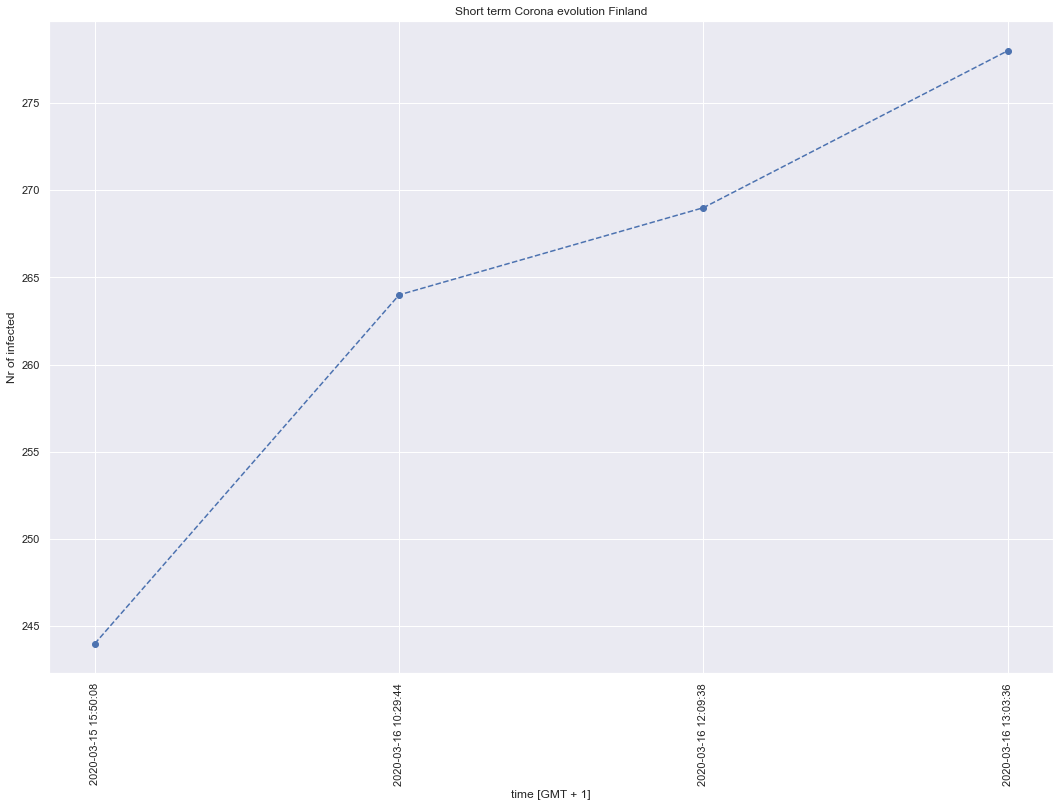

In [6]:


plt.figure(figsize=(18,12))
plt.title('Short term Corona evolution {}'.format(a_country.index[0][0]))
a_country['confirmed'].plot(style ='o--')
plt.xticks(rotation=90)
plt.xticks(range(len(a_country.index)),[a_country.index[i][1] for i in range(len(a_country.index))])
plt.xlabel('time [GMT + 1]')

plt.ylabel('Nr of infected')
#plt.ylabel(r'Nr of infected [ $10^{x}$ ]')
#plt.yscale('log')

filename = 'corona_short_term_' + a_country.index[0][0] + '.jpg'
plt.savefig (filename,format='jpg')


In [7]:
top_dead_pct = df.loc[df['confirmed'] > 500].sort_values('dead_pct',ascending=False)
top_dead_pct

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
Italy,24747.0,NaN,NaN,NaN,1809.0,NaN,2335.0,20603.0,1672.0,409.3,7.309977,2020-03-16 16:54:13
Iran,14991.0,13938.0,1053.0,1.075549,853.0,129.0,4590.0,9548.0,NaN,178.5,5.690081,2020-03-16 16:54:13
China,80880.0,80844.0,36.0,1.000445,3213.0,14.0,67819.0,9848.0,3226.0,56.2,3.972552,2020-03-16 16:54:13
Spain,9428.0,7988.0,1440.0,1.180270,335.0,41.0,530.0,8563.0,272.0,201.6,3.553246,2020-03-16 16:54:13
Japan,845.0,839.0,6.0,1.007151,27.0,3.0,144.0,674.0,36.0,6.7,3.195266,2020-03-16 16:54:13
France,5423.0,NaN,NaN,NaN,127.0,NaN,12.0,5284.0,400.0,83.1,2.341877,2020-03-16 16:54:13
UK,1543.0,1391.0,152.0,1.109274,36.0,1.0,20.0,1487.0,20.0,22.7,2.333117,2020-03-16 16:54:13
USA,4040.0,3680.0,360.0,1.097826,70.0,2.0,73.0,3897.0,12.0,12.2,1.732673,2020-03-16 16:54:13
Netherlands,1413.0,1135.0,278.0,1.244934,24.0,4.0,2.0,1387.0,45.0,82.5,1.698514,2020-03-16 16:54:13
Diamond Princess,696.0,NaN,NaN,NaN,7.0,NaN,456.0,233.0,15.0,NaN,1.005747,2020-03-16 16:54:13


In [8]:
country_names = sorted(df.index.values)
#country_names

In [9]:
df.loc[df['confirmed'] > 100].sort_values('factor',ascending=False)

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
Pakistan,136.0,53.0,83.0,2.566038,0.0,NaN,2.0,134.0,NaN,0.6,NaN,2020-03-16 16:54:13
Chile,155.0,75.0,80.0,2.066667,0.0,NaN,NaN,155.0,NaN,8.1,NaN,2020-03-16 16:54:13
Portugal,331.0,245.0,86.0,1.351020,0.0,NaN,3.0,328.0,9.0,32.5,NaN,2020-03-16 16:54:13
Malaysia,566.0,428.0,138.0,1.322430,0.0,NaN,42.0,524.0,9.0,17.5,NaN,2020-03-16 16:54:13
Thailand,147.0,114.0,33.0,1.289474,1.0,NaN,35.0,111.0,1.0,2.1,0.680272,2020-03-16 16:54:13
Australia,375.0,300.0,75.0,1.250000,5.0,NaN,27.0,343.0,1.0,14.7,1.333333,2020-03-16 16:54:13
Poland,156.0,125.0,31.0,1.248000,3.0,NaN,NaN,153.0,3.0,4.1,1.923077,2020-03-16 16:54:13
Netherlands,1413.0,1135.0,278.0,1.244934,24.0,4.0,2.0,1387.0,45.0,82.5,1.698514,2020-03-16 16:54:13
Estonia,205.0,171.0,34.0,1.198830,0.0,NaN,1.0,204.0,NaN,154.5,NaN,2020-03-16 16:54:13
Israel,255.0,213.0,42.0,1.197183,0.0,NaN,4.0,251.0,4.0,29.5,NaN,2020-03-16 16:54:13


In [10]:
top_10_per_m = df.sort_values('confirmed_per_M',ascending=False).head(10)
top_10_per_m

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
Italy,24747.0,NaN,NaN,NaN,1809.0,NaN,2335.0,20603.0,1672.0,409.3,7.309977,2020-03-16 16:54:13
Switzerland,2221.0,2217.0,4.0,1.001804,18.0,4.0,4.0,2199.0,NaN,256.6,0.810446,2020-03-16 16:54:13
Norway,1312.0,1256.0,56.0,1.044586,3.0,NaN,1.0,1308.0,27.0,242.0,0.228659,2020-03-16 16:54:13
Spain,9428.0,7988.0,1440.0,1.180270,335.0,41.0,530.0,8563.0,272.0,201.6,3.553246,2020-03-16 16:54:13
Iran,14991.0,13938.0,1053.0,1.075549,853.0,129.0,4590.0,9548.0,NaN,178.5,5.690081,2020-03-16 16:54:13
S. Korea,8236.0,8162.0,74.0,1.009066,75.0,NaN,1137.0,7024.0,59.0,160.6,0.910636,2020-03-16 16:54:13
Denmark,898.0,864.0,34.0,1.039352,4.0,2.0,1.0,893.0,10.0,155.0,0.445434,2020-03-16 16:54:13
Estonia,205.0,171.0,34.0,1.198830,0.0,NaN,1.0,204.0,NaN,154.5,NaN,2020-03-16 16:54:13
Qatar,439.0,401.0,38.0,1.094763,0.0,NaN,4.0,435.0,NaN,152.4,NaN,2020-03-16 16:54:13
Bahrain,221.0,214.0,7.0,1.032710,1.0,1.0,77.0,143.0,1.0,129.9,0.452489,2020-03-16 16:54:13


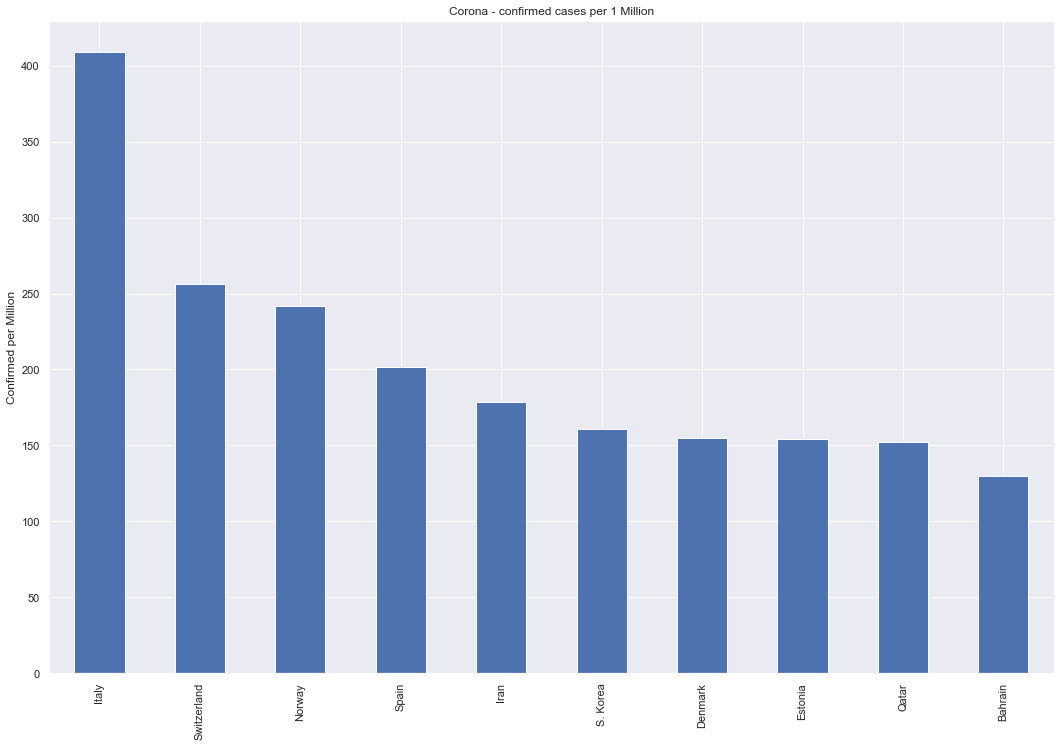

In [11]:
plt.figure(figsize=(18,12))
plt.title('Corona - confirmed cases per 1 Million')
plt.ylabel ('Confirmed per Million')
top_10_per_m['confirmed_per_M'].plot(kind='bar')
plt.savefig('confirmed_per_million.jpg',format='jpg')

In [12]:
totals = pd.DataFrame(df.sum(),columns=['totals'])
totals.drop(['factor','confirmed_per_M','dead_pct','datetime'],inplace=True)
totals

,totals
confirmed,175691
yesterday,136835
inc,6131
dead,6715
dead_inc,210
recovered,77868
active_cases,91108
serious,5967


In [13]:
country_names = list(sorted((df.index.unique().values)))
#country_names

In [14]:
some_countries = ['Sweden','USA','Italy','Spain','Norway','Finland',
                  'Denmark','Singapore','S. Korea','China','Russia',
                 'Poland','Taiwan','Estonia']
countries_of_interest = df.loc[some_countries,:]
countries_of_interest.sort_values('confirmed',inplace=True,ascending=False)
countries_of_interest

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
China,80880.0,80844.0,36.0,1.000445,3213.0,14.0,67819.0,9848.0,3226.0,56.2,3.972552,2020-03-16 16:54:13
Italy,24747.0,NaN,NaN,NaN,1809.0,NaN,2335.0,20603.0,1672.0,409.3,7.309977,2020-03-16 16:54:13
Spain,9428.0,7988.0,1440.0,1.180270,335.0,41.0,530.0,8563.0,272.0,201.6,3.553246,2020-03-16 16:54:13
S. Korea,8236.0,8162.0,74.0,1.009066,75.0,NaN,1137.0,7024.0,59.0,160.6,0.910636,2020-03-16 16:54:13
USA,4040.0,3680.0,360.0,1.097826,70.0,2.0,73.0,3897.0,12.0,12.2,1.732673,2020-03-16 16:54:13
Norway,1312.0,1256.0,56.0,1.044586,3.0,NaN,1.0,1308.0,27.0,242.0,0.228659,2020-03-16 16:54:13
Sweden,1103.0,1040.0,63.0,1.060577,7.0,4.0,1.0,1095.0,2.0,109.2,0.634633,2020-03-16 16:54:13
Denmark,898.0,864.0,34.0,1.039352,4.0,2.0,1.0,893.0,10.0,155.0,0.445434,2020-03-16 16:54:13
Finland,278.0,244.0,34.0,1.139344,0.0,NaN,10.0,268.0,1.0,50.2,NaN,2020-03-16 16:54:13
Singapore,243.0,226.0,17.0,1.075221,0.0,NaN,109.0,134.0,11.0,41.5,NaN,2020-03-16 16:54:13


In [15]:
countries_of_interest.sort_values('confirmed_per_M',ascending=False)

,confirmed,yesterday,inc,factor,dead,dead_inc,recovered,active_cases,serious,confirmed_per_M,dead_pct,datetime
Italy,24747.0,NaN,NaN,NaN,1809.0,NaN,2335.0,20603.0,1672.0,409.3,7.309977,2020-03-16 16:54:13
Norway,1312.0,1256.0,56.0,1.044586,3.0,NaN,1.0,1308.0,27.0,242.0,0.228659,2020-03-16 16:54:13
Spain,9428.0,7988.0,1440.0,1.180270,335.0,41.0,530.0,8563.0,272.0,201.6,3.553246,2020-03-16 16:54:13
S. Korea,8236.0,8162.0,74.0,1.009066,75.0,NaN,1137.0,7024.0,59.0,160.6,0.910636,2020-03-16 16:54:13
Denmark,898.0,864.0,34.0,1.039352,4.0,2.0,1.0,893.0,10.0,155.0,0.445434,2020-03-16 16:54:13
Estonia,205.0,171.0,34.0,1.198830,0.0,NaN,1.0,204.0,NaN,154.5,NaN,2020-03-16 16:54:13
Sweden,1103.0,1040.0,63.0,1.060577,7.0,4.0,1.0,1095.0,2.0,109.2,0.634633,2020-03-16 16:54:13
China,80880.0,80844.0,36.0,1.000445,3213.0,14.0,67819.0,9848.0,3226.0,56.2,3.972552,2020-03-16 16:54:13
Finland,278.0,244.0,34.0,1.139344,0.0,NaN,10.0,268.0,1.0,50.2,NaN,2020-03-16 16:54:13
Singapore,243.0,226.0,17.0,1.075221,0.0,NaN,109.0,134.0,11.0,41.5,NaN,2020-03-16 16:54:13


 [-----------------100%-----------------] 10000 of 10000 complete in 9.1 sec

,alpha_post,beta_post,sigma_post,linreq_mu_post
count,2500.000000,2500.000000,2500.000000,2500.000000
mean,-0.005253,-0.157607,1.003661,1.003661
std,0.045792,0.101716,0.079180,0.079180
min,-0.202345,-0.464355,0.771108,0.771108
25%,-0.020791,-0.227112,0.950034,0.950034
50%,-0.001390,-0.157834,0.996439,0.996439
75%,0.002937,-0.087165,1.054980,1.054980
max,0.193309,0.178599,1.353027,1.353027


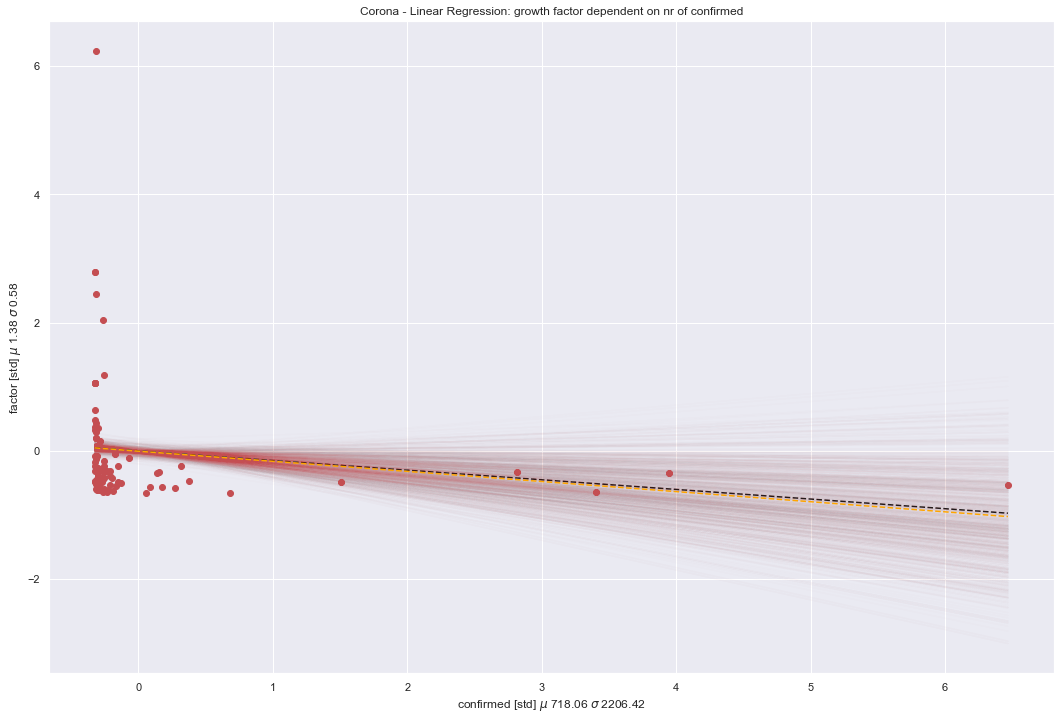

In [64]:
# scatter

def standardize(x):
    return (x - x.mean()) / x.std()

min_confirmed = 1
max_confirmed = 50000 # exclude China for better view

df_no_extrems = df.loc[ ( ( df['confirmed'] > min_confirmed  ) & ( df['confirmed'] < max_confirmed )) ]
df_no_extrems = df_no_extrems.loc[df_no_extrems['factor'] > 0]

x = df_no_extrems['confirmed']
x = standardize(x)
y = df_no_extrems['factor']
y = standardize(y)

slope,intercept,_,_,_ = sps.linregress(x,y)

alpha_mu = 0
alpha_sigma = 0.1
beta_mu = -0.2
beta_sigma = 0.3


alpha = pm.Normal('alpha',mu=alpha_mu,tau = 1 / alpha_sigma ** 2)
beta = pm.Normal('beta',mu=beta_mu,tau = 1 / beta_sigma ** 2)

# by changing sigma from uniform to lognormal, the y-range of sample plot below
# shrunk a lot

sigma = pm.Uniform('sigma',lower=0,upper=10)

@pm.deterministic()
def linreq_mu(x=x,beta=beta,alpha=alpha):
    return x * beta + alpha

likelihood  = pm.Normal('likelihood',mu=linreq_mu,tau= 1 / sigma ** 2,
                       observed=True,value=y)

model = pm.Model([alpha,beta,sigma,linreq_mu,likelihood])
map_ = pm.MAP(model)
map_.fit()

mcmc = pm.MCMC(model)

mcmc.sample(10000,5000,2)

alpha_samples = mcmc.trace('alpha')[:]
beta_samples = mcmc.trace('beta')[:]
sigma_samples = mcmc.trace('sigma')[:]
linreq_mu_samples = mcmc.trace('sigma')[:]

result = pd.DataFrame({'alpha_post': alpha_samples,
                     'beta_post' : beta_samples,
                     'sigma_post' : sigma_samples,
                     'linreq_mu_post' : linreq_mu_samples})

nr_rows = 100
nr_samples = 1000

alphas = np.random.choice(result['alpha_post'],replace=True,size=nr_samples)
betas = np.random.choice(result['beta_post'],replace=True,size=nr_samples)

X = np.linspace(x.min(),x.max(),nr_rows)

line_ys = np.array([X[i] * betas + alphas for i in range(len(X))])

plt.figure(figsize=(18,12))
plt.title('Corona - Linear Regression: growth factor dependent on nr of confirmed')
plt.ylabel(r'factor [std] $\mu$ {:.2f} $\sigma$ {:.2f}'.format(df_no_extrems['factor'].mean(),
                                                              df_no_extrems['factor'].std()))
plt.xlabel(r'confirmed [std] $\mu$ {:.2f} $\sigma$ {:.2f}'.format(df_no_extrems['confirmed'].mean(),
                                                             df_no_extrems['confirmed'].std()))
plt.scatter(x,y,color='r')
plt.plot(X,[X[i] * slope + intercept for i in range(len(X))],color='k',ls='dashed')
plt.plot(X,line_ys,color='r',alpha = 0.01)
plt.plot(X,[X[i] * result['beta_post'].mean() + result['alpha_post'].mean() for i in range(len(X))],
        color='orange',ls='dashed')
result.describe()
